# Setting

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Đọc dữ liệu

In [6]:
df = pd.read_csv('D:\\9. ky2nam3\\ML\\Project_ML\\data\\preprocessed_data.csv')
X = df.drop(columns=['satisfaction_satisfied', "Index", "id"])
y  = df['satisfaction_satisfied']

# Giảm chiều với PCA

## Tạo PCA

In [63]:
df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')

X = df_cleaned.drop(columns=['satisfaction_satisfied'])
y = df_cleaned['satisfaction_satisfied']

n_componets = 21
pca = PCA(n_components=n_componets)
X_pca = pca.fit_transform(X)


## Kiểm tra số chiều để lại 90% dữ liệu

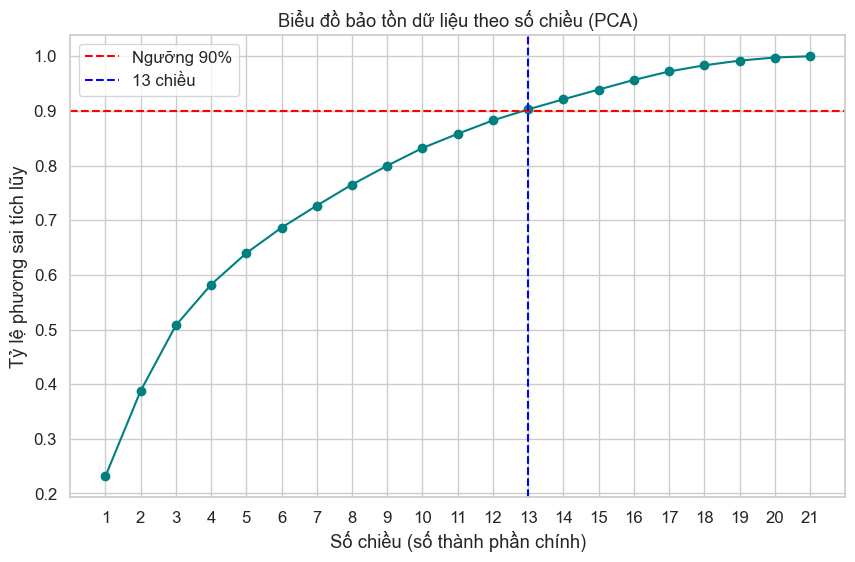

In [55]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

threshold_dim = (cumulative_variance >= 0.9).argmax() + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_componets + 1), cumulative_variance, marker='o', linestyle='-', color='teal')
plt.xticks(range(1, n_componets + 1))
plt.xlabel('Số chiều (số thành phần chính)')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.title('Biểu đồ bảo tồn dữ liệu theo số chiều (PCA)')

plt.axhline(y=0.9, color='red', linestyle='--', label='Ngưỡng 90%')

plt.axvline(x=threshold_dim, color='blue', linestyle='--', label=f'{threshold_dim} chiều')
plt.legend()
plt.show()


## Trực quan hóa PC1 và 2

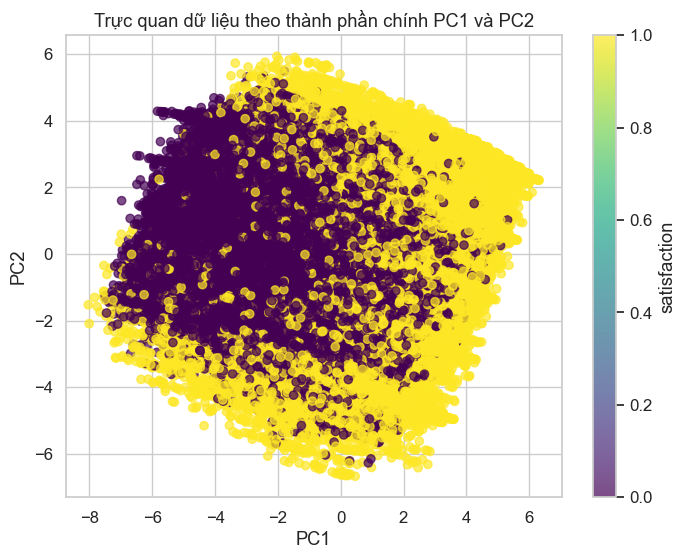

In [64]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Trực quan dữ liệu theo thành phần chính PC1 và PC2')
plt.colorbar(sc, label='satisfaction')
plt.grid(True)
plt.show()


## Tỷ lệ giải thích từng PC

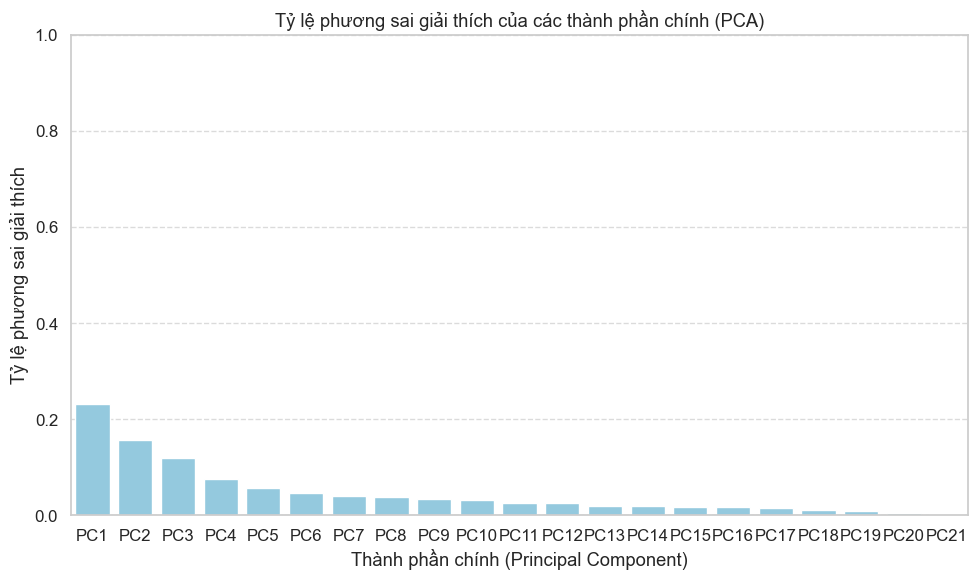

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=[f'PC{i+1}' for i in range(len(explained_variance))],
    y=explained_variance,
    color='skyblue'
)
plt.title('Tỷ lệ phương sai giải thích của các thành phần chính (PCA)')
plt.xlabel('Thành phần chính (Principal Component)')
plt.ylabel('Tỷ lệ phương sai giải thích')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Tương quan trong dữ liệu mới

In [75]:
df_pca = pd.DataFrame(X_pca[:, :13], columns=[f'PC{i+1}' for i in range(13)])
df_pca['satisfaction_satisfied'] = y.values

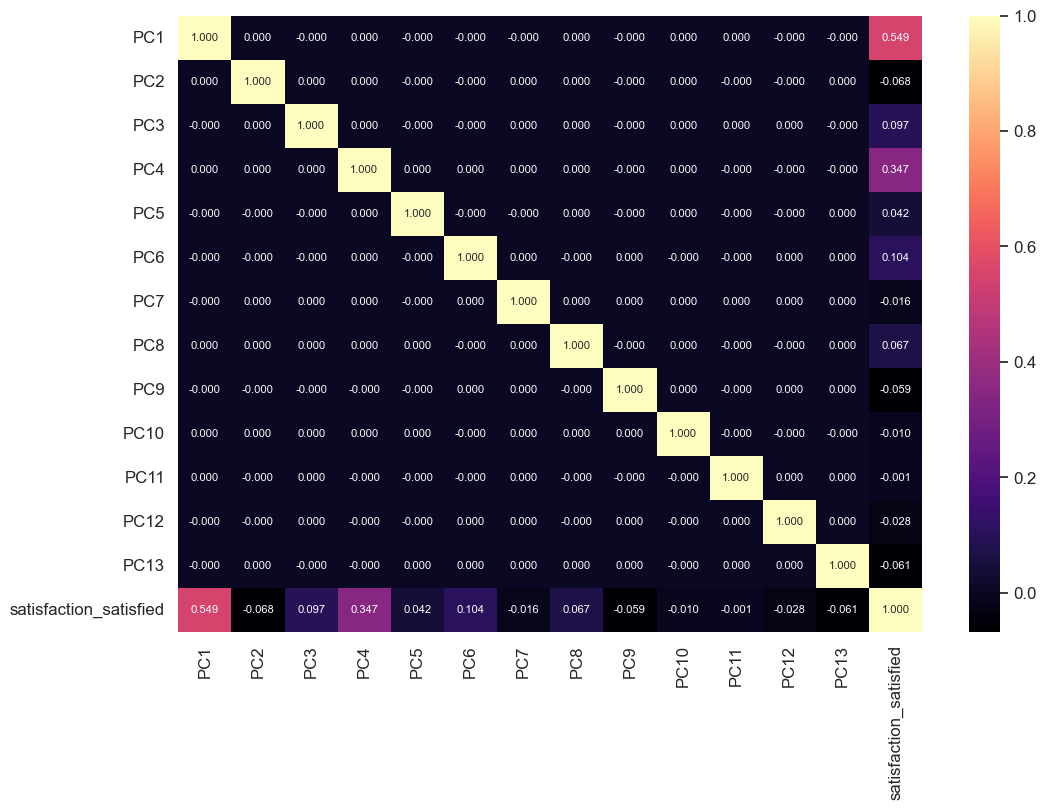

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_pca.corr(), 
    annot=True, 
    fmt=".3f",      
    cmap='magma',
    annot_kws={'size': 8}
)

plt.show()

## Lưu dữ liệu mới

In [91]:
# df_pca.to_csv('D:\\9. ky2nam3\\ML\\Project_ML\\data\\data_pca.csv', index=False)

# Giảm chiều với LDA

In [77]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

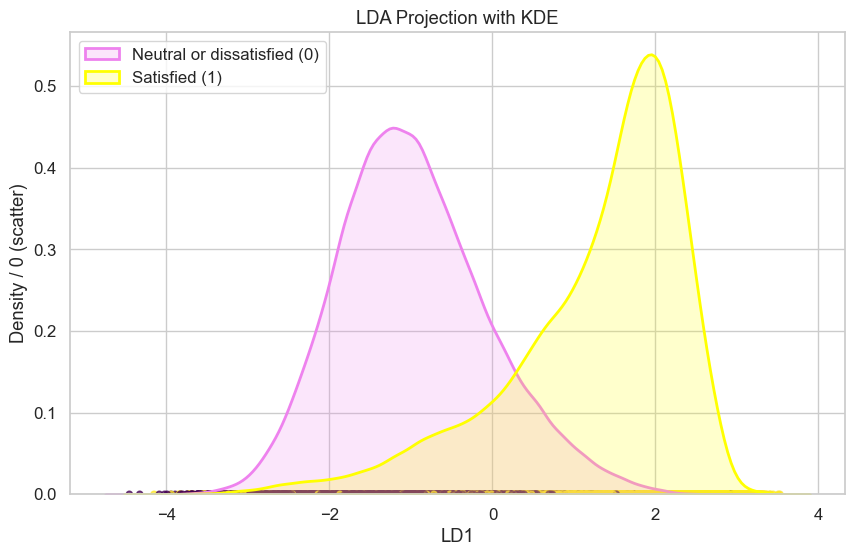

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    X_lda[:, 0], 
    [0] * len(X_lda), 
    c=y, 
    cmap='viridis', 
    alpha=0.7, 
    s=20, 
    zorder=1
)

sns.kdeplot(
    X_lda[y == 0, 0], 
    fill=True, 
    alpha=0.2, 
    color='violet',
    label='Neutral or dissatisfied (0)', 
    ax=ax, 
    linewidth=2,
    zorder=2
)
sns.kdeplot(
    X_lda[y == 1, 0], 
    fill=True, 
    alpha=0.2, 
    color='yellow',
    label='Satisfied (1)', 
    ax=ax, 
    linewidth=2,
    zorder=2
)    

ax.set_xlabel('LD1')
ax.set_ylabel('Density / 0 (scatter)')
ax.set_title('LDA Projection with KDE')
ax.legend()
ax.grid(True)

plt.show()

In [83]:
mean_class_0 = np.mean(X_lda[y == 0])
mean_class_1 = np.mean(X_lda[y == 1])
separation = abs(mean_class_0 - mean_class_1)

print(f"Khoảng cách trung bình giữa hai lớp trong không gian LD1: {separation:.4f}")


Khoảng cách trung bình giữa hai lớp trong không gian LD1: 2.2365


## Dữ liệu mới

In [86]:
df_lda = pd.DataFrame(X_lda, columns=['LD1'])
df_lda['satisfaction_satisfied'] = y.values

In [92]:
df_lda.to_csv("D:\\9. ky2nam3\\ML\\Project_ML\\data\\data_lda.csv", index=False)